In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
df.shape

(400, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['Serial No.'] ,inplace=True)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [10]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [13]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [16]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()
model.add(Dense(7 ,activation='relu', input_dim=7))
model.add(Dense(7 ,activation='relu'))
model.add(Dense(7 ,activation='relu'))
model.add(Dense(1, activation='linear'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [20]:
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
8/8 [==============================] - 1s 55ms/step - loss: 0.7165 - val_loss: 0.6939
Epoch 2/200
8/8 [==============================] - 0s 10ms/step - loss: 0.6114 - val_loss: 0.6132
Epoch 3/200
8/8 [==============================] - 0s 12ms/step - loss: 0.5491 - val_loss: 0.5847
Epoch 4/200
8/8 [==============================] - 0s 12ms/step - loss: 0.5231 - val_loss: 0.5586
Epoch 5/200
8/8 [==============================] - 0s 10ms/step - loss: 0.5019 - val_loss: 0.5360
Epoch 6/200
8/8 [==============================] - 0s 10ms/step - loss: 0.4860 - val_loss: 0.5209
Epoch 7/200
8/8 [==============================] - 0s 10ms/step - loss: 0.4737 - val_loss: 0.5086
Epoch 8/200
8/8 [==============================] - 0s 13ms/step - loss: 0.4623 - val_loss: 0.4972
Epoch 9/200
8/8 [==============================] - 0s 13ms/step - loss: 0.4514 - val_loss: 0.4864
Epoch 10/200
8/8 [==============================] - 0s 11ms/step - loss: 0.4411 - val_loss: 0.4759
Epoch 11/200
8/8 [=

Epoch 84/200
8/8 [==============================] - 0s 25ms/step - loss: 0.0676 - val_loss: 0.0771
Epoch 85/200
8/8 [==============================] - 0s 21ms/step - loss: 0.0659 - val_loss: 0.0751
Epoch 86/200
8/8 [==============================] - 0s 21ms/step - loss: 0.0642 - val_loss: 0.0732
Epoch 87/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0626 - val_loss: 0.0713
Epoch 88/200
8/8 [==============================] - 0s 13ms/step - loss: 0.0610 - val_loss: 0.0695
Epoch 89/200
8/8 [==============================] - 0s 12ms/step - loss: 0.0595 - val_loss: 0.0677
Epoch 90/200
8/8 [==============================] - 0s 24ms/step - loss: 0.0581 - val_loss: 0.0660
Epoch 91/200
8/8 [==============================] - 0s 23ms/step - loss: 0.0566 - val_loss: 0.0644
Epoch 92/200
8/8 [==============================] - 0s 13ms/step - loss: 0.0553 - val_loss: 0.0627
Epoch 93/200
8/8 [==============================] - 0s 12ms/step - loss: 0.0540 - val_loss: 0.0612
Epoch 94/2

8/8 [==============================] - 0s 10ms/step - loss: 0.0176 - val_loss: 0.0168
Epoch 167/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0172 - val_loss: 0.0166
Epoch 168/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0168 - val_loss: 0.0162
Epoch 169/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0165 - val_loss: 0.0160
Epoch 170/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0161 - val_loss: 0.0159
Epoch 171/200
8/8 [==============================] - 0s 13ms/step - loss: 0.0159 - val_loss: 0.0156
Epoch 172/200
8/8 [==============================] - 0s 12ms/step - loss: 0.0156 - val_loss: 0.0152
Epoch 173/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 174/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0150 - val_loss: 0.0147
Epoch 175/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0149 - val_loss: 0.0145
Epoch 176/200


In [21]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 3ms/step


In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4866796465576567

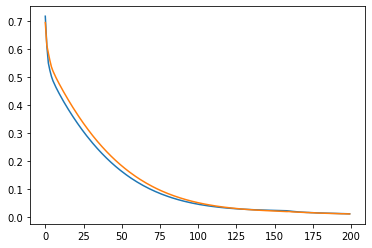

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])